# About Dataset
## 1.Context
### More and more plastic is being generated every year and more of which is getting dumped into the ocean or is mishandled.

### The focus of this study was to understand how much plastic a country produces over a year's period and how much of that plastic is mismanaged.

## 2.Content
### Datasets contains:
### i)Global plastic production from year 1950 to 2015.
### ii)Along with this, it contains waste generated per person (per day/kg) & mismanaged waste per person (per day/kg) for the year 2010.

## 3.Acknowledgements
### This dataset was gathered from Our World in Data from their article Plastic Pollution.

In [386]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt 
%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

## First Dataset

In [387]:
#Loading and reading the dataset
df = pd.read_csv("per-capita-plastic-waste-vs-gdp-per-capita.csv")

In [388]:
#Display first 5 rows of a dataset
df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [389]:
#Display last 5 rows of a dataset
df.tail()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
48163,Zimbabwe,ZWE,1988,NaN,NaN,9849000.0,NaN
48164,Zimbabwe,ZWE,1989,NaN,NaN,10154000.0,NaN
48165,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN
48166,Zimbabwe,ZWE,2019,NaN,NaN,14645000.0,NaN
48167,Åland Islands,ALA,2015,NaN,NaN,NaN,Europe


In [390]:
#Display shape of dataset
df.shape

(48168, 7)

In [391]:
#Display concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [392]:
#Checking the number of null values in each column
df.isnull().sum()

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita plastic waste (kg/person/day)               47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

In [393]:
#Display summary statistics of dataframe
df.describe()

,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)"
count,48168.000000,186.000000,6407.000000,4.688300e+04
mean,1903.147442,0.179812,14926.095591,2.982790e+07
std,315.716839,0.123006,17739.754531,2.530860e+08
min,-10000.000000,0.010000,247.436540,9.050000e+02
25%,1859.000000,0.103000,3021.071807,2.017335e+05
50%,1920.000000,0.144000,8447.264179,1.542937e+06
75%,1975.000000,0.252000,19607.537075,5.886795e+06
max,2019.000000,0.686000,135318.754421,7.713468e+09


### Data Cleaning Of First Dataset

In [394]:
#Rename columns for easy indexing and slicing
df.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP', 
                   'Total population (Gapminder, HYDE & UN)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste generated(kg/person/day)'}, inplace=True)
df.columns

Index(['Entity', 'Code', 'Year', 'Waste generated(kg/person/day)',
       'GDP per capita in PPP', 'Total Population', 'Continent'],
      dtype='object')

In [395]:
#Retrieving the rows with year = 2010
df_2010 = df[df['Year'] == 2010]

In [396]:
#Display structure/shape of dataset
df_2010.shape

(292, 7)

In [397]:
#Checking percentage of null values in each column
column_name = []
null_values = []
for column in df_2010.columns:
    column_name.append(column)
    null_values.append(round(((df_2010[column].isnull().sum() / len(df)) * 100),2))
df1 = pd.DataFrame(list(zip(column_name,null_values)),columns=['column_name','% of null values'])
df1

,column_name,% of null values
0,Entity,0.00
1,Code,0.11
2,Year,0.00
3,Waste generated(kg/person/day),0.22
4,GDP per capita in PPP,0.12
5,Total Population,0.10
6,Continent,0.61


In [398]:
#Removing all the rows containing incomplete data about generated waste,GDP and Total Population 
incmp_df_2010_index = df_2010[df_2010['Waste generated(kg/person/day)'].isna() | df_2010['GDP per capita in PPP'].isna() | df_2010['Total Population'].isna()].index
df_2010.drop(incmp_df_2010_index, inplace=True)

In [399]:
#Display first 5 rows of a dataset
df_2010.head()

,Entity,Code,Year,Waste generated(kg/person/day),GDP per capita in PPP,Total Population,Continent
344,Albania,ALB,2010,0.069,9927.181841,2948000.0,NaN
564,Algeria,DZA,2010,0.144,12870.602699,35977000.0,NaN
1074,Angola,AGO,2010,0.062,5897.682841,23356000.0,NaN
1365,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,NaN
1613,Argentina,ARG,2010,0.183,18712.063077,40896000.0,NaN


In [400]:
df_2010.shape

(148, 7)

In [401]:
'''retrieving continent name in which year == 2015'''
#Retrieving the rows with year = 2015
df_2015 = df[df['Year'] == 2015]

In [402]:
df_2015.head()

,Entity,Code,Year,Waste generated(kg/person/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
14,Afghanistan,AFG,2015,NaN,1809.016488,3.441400e+07,Asia
338,Africa,NaN,2015,NaN,NaN,1.182439e+09,NaN
343,Akrotiri and Dhekelia,OWID_AKD,2015,NaN,NaN,NaN,Asia
369,Albania,ALB,2015,NaN,10970.452245,2.891000e+06,Europe


In [403]:
df_2015.shape

(337, 7)

In [404]:
for i in df_2010['Entity'].values:
    if i in df[df['Year'] == 2015]['Entity'].values:
        pass
    else:
        print(i)

In [405]:
df_2015_index = list(df_2015.index)
continent_dict = {}
for i in df_2015_index:
    continent_dict[df_2015.loc[i]['Entity']] = df_2015.loc[i]['Continent']

In [406]:
continent_dict

{'Abkhazia': 'Asia',
 'Afghanistan': 'Asia',
 'Africa': nan,
 'Akrotiri and Dhekelia': 'Asia',
 'Albania': 'Europe',
 'Algeria': 'Africa',
 'American Samoa': 'Oceania',
 'Andorra': 'Europe',
 'Angola': 'Africa',
 'Anguilla': 'North America',
 'Antarctica': 'Antarctica',
 'Antigua and Barbuda': 'North America',
 'Arab World': nan,
 'Argentina': 'South America',
 'Armenia': 'Asia',
 'Aruba': 'North America',
 'Asia': nan,
 'Australia': 'Oceania',
 'Austria': 'Europe',
 'Austria-Hungary': 'Europe',
 'Azerbaijan': 'Asia',
 'Baden': 'Europe',
 'Bahamas': 'North America',
 'Bahrain': 'Asia',
 'Bangladesh': 'Asia',
 'Barbados': 'North America',
 'Bavaria': 'Europe',
 'Belarus': 'Europe',
 'Belgium': 'Europe',
 'Belize': 'North America',
 'Benin': 'Africa',
 'Bermuda': 'North America',
 'Bhutan': 'Asia',
 'Bolivia': 'South America',
 'Bonaire Sint Eustatius and Saba': 'North America',
 'Bosnia and Herzegovina': 'Europe',
 'Botswana': 'Africa',
 'Bouvet Island': 'Antarctica',
 'Brazil': 'South 

In [407]:
for i in list(df_2010.index):
    for j in continent_dict.keys():
        if df_2010.loc[i]['Entity'] == j:
            df_2010.loc[i,'Continent'] = continent_dict[j]

In [408]:
df_2010.head()

,Entity,Code,Year,Waste generated(kg/person/day),GDP per capita in PPP,Total Population,Continent
344,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
564,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
1074,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
1365,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America
1613,Argentina,ARG,2010,0.183,18712.063077,40896000.0,South America


In [409]:
df_2010.isnull().sum()

Entity                            0
Code                              0
Year                              0
Waste generated(kg/person/day)    0
GDP per capita in PPP             0
Total Population                  0
Continent                         0
dtype: int64

In [410]:
#Reset index
waste_generated = df_2010.reset_index().drop('index', axis=1)
waste_generated.head()

,Entity,Code,Year,Waste generated(kg/person/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America
4,Argentina,ARG,2010,0.183,18712.063077,40896000.0,South America


## Second Dataset 


In [411]:
#Loading and reading the dataset
df2 = pd.read_csv('per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')

In [412]:
#Display first 5 rows of a dataset
df2.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


### Data Cleaning Of Second Dataset

In [413]:
#Rename columns for easy indexing and slicing
df2.rename(columns={'Per capita mismanaged plastic waste': 'Mismanaged waste(kg/person/day)',
                  'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP',
                  'Total population (Gapminder, HYDE & UN)': 'Total Population'}, inplace=True)

In [414]:
#Retrieving the rows with year = 2010
df2_2010 = df2[df2['Year'] == 2010]
df2_2010.head()

,Entity,Code,Year,Mismanaged waste(kg/person/day),GDP per capita in PPP,Total Population,Continent
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07,NaN
333,Africa,NaN,2010,NaN,NaN,1.039304e+09,NaN
344,Albania,ALB,2010,0.032,9927.181841,2.948000e+06,NaN
564,Algeria,DZA,2010,0.086,12870.602699,3.597700e+07,NaN
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04,NaN


In [415]:
#Display structure/shape of dataset
df2_2010.shape

(292, 7)

In [416]:
#Checking percentage of null values in each column
column_name = []
null_values = []
for column in df2_2010.columns:
    column_name.append(column)
    null_values.append(round(((df2_2010[column].isnull().sum() / len(df)) * 100),2))
df1 = pd.DataFrame(list(zip(column_name,null_values)),columns=['column_name','% of null values'])
df1

,column_name,% of null values
0,Entity,0.00
1,Code,0.11
2,Year,0.00
3,Mismanaged waste(kg/person/day),0.22
4,GDP per capita in PPP,0.12
5,Total Population,0.10
6,Continent,0.61


In [417]:
#Removing all the rows containing incomplete data about mismanaged waste,GDP and Total Population 
incmp_df2_2010_index = df2_2010[df2_2010['Mismanaged waste(kg/person/day)'].isna() | df2_2010['GDP per capita in PPP'].isna() | df2_2010['Total Population'].isna()].index
df2_2010.drop(incmp_df_2010_index, inplace=True)

In [418]:
#Display structure/shape of dataset
df2_2010.shape

(148, 7)

In [419]:
#Drop continent column
df2_2010.drop('Continent', axis=1, inplace=True)

In [422]:
#Reset index
mismanaged_waste = df2_2010.reset_index().drop('index', axis=1)
mismanaged_waste.head()

,Entity,Code,Year,Mismanaged waste(kg/person/day),GDP per capita in PPP,Total Population
0,Albania,ALB,2010,0.032,9927.181841,2948000.0
1,Algeria,DZA,2010,0.086,12870.602699,35977000.0
2,Angola,AGO,2010,0.045,5897.682841,23356000.0
3,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0
4,Argentina,ARG,2010,0.026,18712.063077,40896000.0


In [427]:
#Merging above two cleaned dataset:- waste_generated and mismanaged_waste
df_plastic_waste = pd.merge(waste_generated, mismanaged_waste, how='inner')
df_plastic_waste.head()

,Entity,Code,Year,Waste generated(kg/person/day),GDP per capita in PPP,Total Population,Continent,Mismanaged waste(kg/person/day)
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe,0.032
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa,0.086
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa,0.045
3,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America,0.051
4,Argentina,ARG,2010,0.183,18712.063077,40896000.0,South America,0.026


In [447]:
''' column names '''
col_names = ['Entity','Code','Year','Waste generated(kg/person/day)','Mismanaged waste(kg/person/day)',
           'GDP per capita in PPP','Total Population','Continent']

df_plastic_waste = df_plastic_waste[col_names]

'''rounding the values per person'''
df_plastic_waste.iloc[:, 3:5] = np.around(df_plastic_waste[['Waste generated(kg/person/day)','Mismanaged waste(kg/person/day)']], decimals=2)

''' changing data type '''
df_plastic_waste['Total Population'] = df_plastic_waste['Total Population'].astype(int)

In [448]:
'''Generating Total waste and Total mismanaged waste by country'''
df_plastic_waste['Total waste(kgs/year)'] = ((df_plastic_waste['Waste generated(kg/person/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)
df_plastic_waste['Total waste mismanaged(kgs/year)'] = ((df_plastic_waste['Mismanaged waste(kg/person/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)

In [449]:
df_plastic_waste.head()

,Entity,Code,Year,Waste generated(kg/person/day),Mismanaged waste(kg/person/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
0,Albania,ALB,2010,0.07,0.03,9927.181841,2948000,Europe,7.532140e+07,3.228060e+07
1,Algeria,DZA,2010,0.14,0.09,12870.602699,35977000,Africa,1.838425e+09,1.181844e+09
2,Angola,AGO,2010,0.06,0.04,5897.682841,23356000,Africa,5.114964e+08,3.409976e+08
3,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,North America,2.119920e+07,1.606000e+06
4,Argentina,ARG,2010,0.18,0.03,18712.063077,40896000,South America,2.686867e+09,4.478112e+08


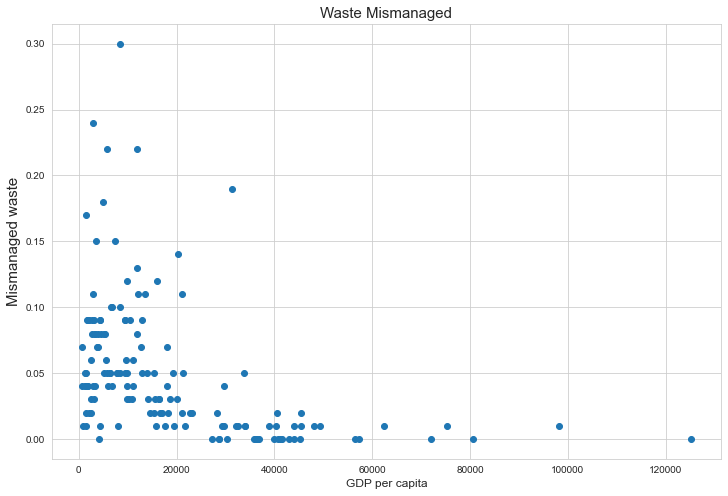

In [450]:
''' scatter plot graph '''

plt.figure(1, figsize=(12,8))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Mismanaged waste(kg/person/day)'])
plt.title('Waste Mismanaged', loc='center', fontsize=15)
plt.ylabel('Mismanaged waste', loc='center', fontsize=15)
plt.xlabel('GDP per capita', fontsize=12)

plt.show()

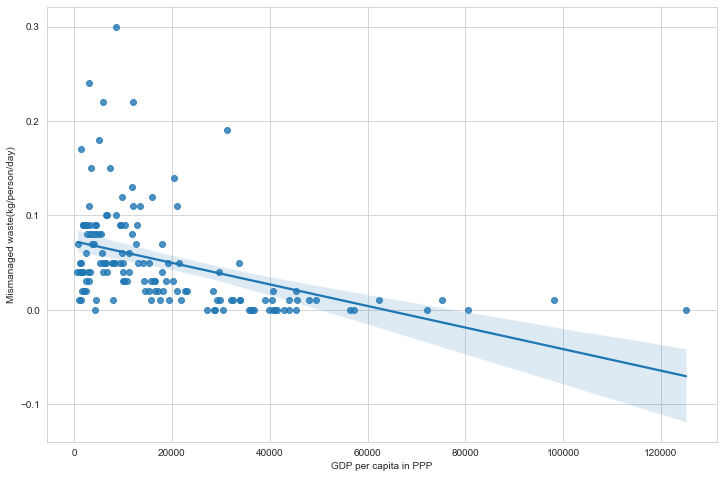

In [451]:
plt.figure(1, figsize=(12,8))
sns.regplot(x='GDP per capita in PPP', y='Mismanaged waste(kg/person/day)', data=df_plastic_waste)

plt.show()

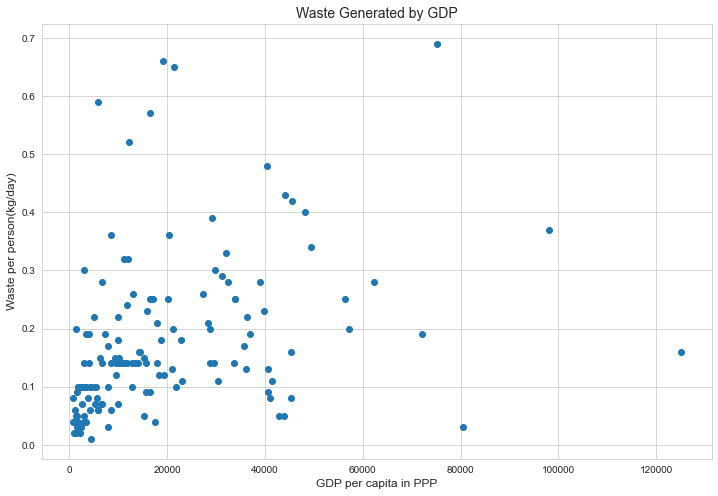

In [452]:
''' scatter plot '''

plt.figure(2, figsize=(12,8))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Waste generated(kg/person/day)'])
plt.title('Waste Generated by GDP', loc='center', fontsize=14)
plt.ylabel('Waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)
plt.show()

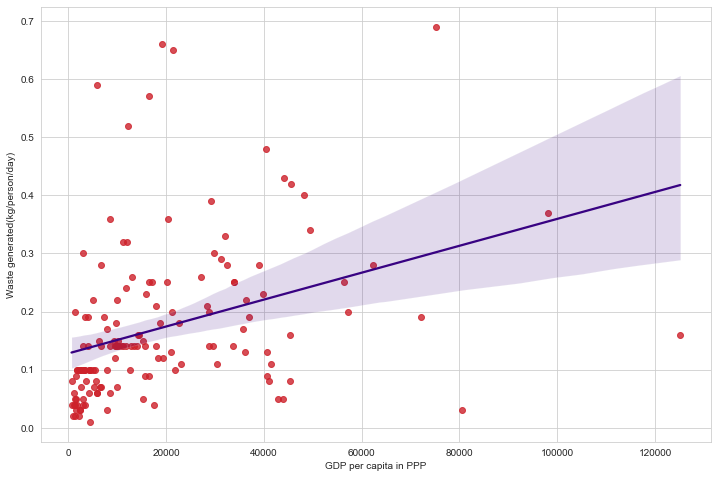

In [453]:
plt.figure(2, figsize=(12,8))
_ = sns.regplot(x=df_plastic_waste['GDP per capita in PPP'], y=df_plastic_waste['Waste generated(kg/person/day)'],
           scatter_kws={'color': '#CD212A'}, line_kws={'color': '#380282'})
plt.show()